In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.shape # lets check the dimensions of the dataframe

(5728, 2)

In [5]:
df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [6]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

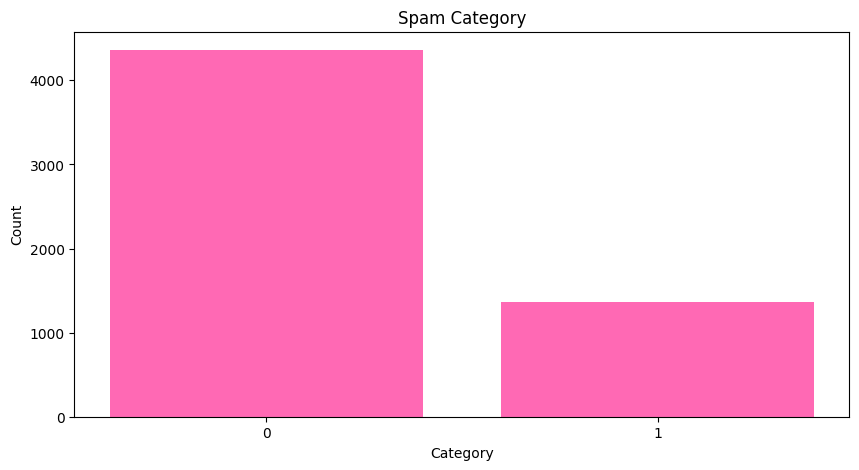

In [11]:
spam_cateogry = ["0", "1"]
count = [4360, 1368]

plt.figure(figsize=(10, 5))
plt.bar(spam_cateogry, count, color='hotpink')
plt.title('Spam Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [12]:
df.duplicated().sum()

33

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()  # check if the duplicates are removed

0

In [15]:
df.isnull().sum()

text    0
spam    0
dtype: int64

No null values in the dataset

In [16]:
df.shape

(5695, 2)

In [17]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

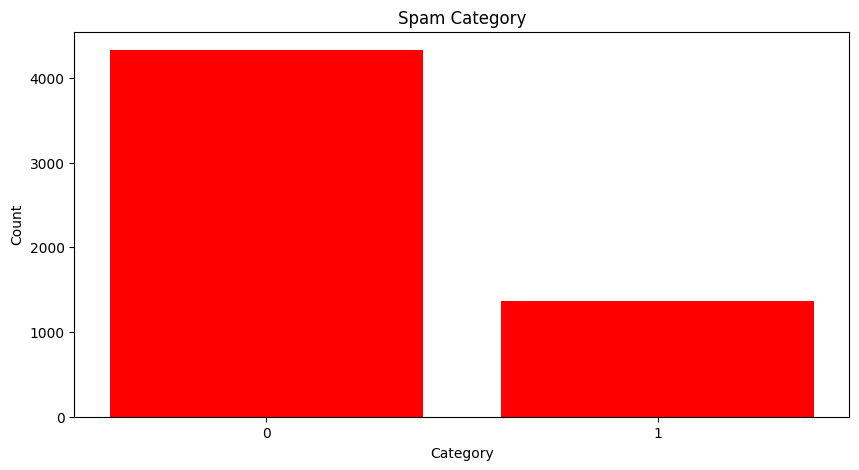

In [19]:
spam_cateogry = ["0", "1"]
count = [4327, 1368]

plt.figure(figsize=(10, 5))
plt.bar(spam_cateogry, count, color='red')
plt.title('Spam Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Splitting the input and output features.

In [20]:
x = df['text'].values
y = df['spam'].values

Now we can split into training and testing components.

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4556,)
(1139,)
(4556,)
(1139,)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

nb = MultinomialNB()

pipeline = make_pipeline(cv,nb)
pipeline.fit(x_train, y_train)
predictions = pipeline.predict(x_test)

accuracy = accuracy_score(y_test, predictions) 
print(f"The accuracy of the model is {accuracy*100:.2f}%")

The accuracy of the model is 99.03%


Let us test the model on new input.

In [26]:
email_input = ["You have won 1000 dollars. Please click the link to claim your prize"]
pipeline.predict(email_input)

array([1], dtype=int64)

It predicts correctly as a spam email.

In [27]:
import pickle
pickle.dump(pipeline, open('model.pkl', 'wb'))  # save the model